In [ ]:


import pandas as pd


try:
    df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()


df.fillna(0, inplace=True)

df.drop_duplicates(inplace=True)


Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]

df
df.to_csv('/content/cleaned_data.csv', index=False)


Error: File not found. Please ensure the file path is correct.


NameError: name 'df' is not defined

: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline
# Load dataset
df = pd.read_csv("/content/cleaned_data.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

print(df.head())

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
del df['type']
del df['nameOrig']
del df['nameDest']
del df['isFlaggedFraud']

# Assign labels and features for training
X = df[['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']]
y = df['isFraud']

# Split dataset to generate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline
# Load dataset
df = pd.read_csv("/content/cleaned_data.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

print(df.head())
# %%
# Check if the columns exist before deleting
if 'type' in df.columns:
    del df['type']
if 'nameOrig' in df.columns:
    del df['nameOrig']
if 'nameDest' in df.columns:
    del df['nameDest']
if 'isFlaggedFraud' in df.columns:
    del df['isFlaggedFraud']


# Assign labels and features for training
X = df[['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']]
y = df['isFraud']

# Split dataset to generate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
from sklearn.naive_bayes import GaussianNB

def GNB_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = GaussianNB()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def GNB_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = GaussianNB()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

GNB_CV(X_train, y_train, 20)
GNB_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.5699936456738558
Cross-validation running time 0:00:00.239543
Training accuracy: 0.5652966039935869
Testing accuracy: 0.5609113321431608
Total running time 0:00:00.029421


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def RFC_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def RFC_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

RFC_CV(X_train, y_train, 20)
RFC_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.9977773129853335
Cross-validation running time 0:00:02.803574
Training accuracy: 0.9977772919399505
Testing accuracy: 0.9986398027714019
Total running time 0:00:00.371508


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

def RFC_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def RFC_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

def RFC_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def RFC_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

# Load dataset and prepare data before calling functions
df = pd.read_csv("/content/cleaned_data.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

print(df.head())

# Check if the columns exist before deleting
if 'type' in df.columns:
    del df['type']
if 'nameOrig' in df.columns:
    del df['nameOrig']
if 'nameDest' in df.columns:
    del df['nameDest']
if 'isFlaggedFraud' in df.columns:
    del df['isFlaggedFraud']

# Assign labels and features for training
X = df[['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']]
y = df['isFraud']

# Split dataset to generate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Now call the functions
RFC_CV(X_train, y_train, 20)
RFC_Train(X_train, y_train, X_test, y_test)

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
Cross-validation accuracy: 0.9977773129853335
Cross-validation running time 0:00:02.378113
Training

In [ ]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def LDA_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = LDA()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def LDA_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = LDA()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

LDA_CV(X_train, y_train, 20)
LDA_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.9977408963793613
Cross-validation running time 0:00:00.551599
Training accuracy: 0.9977408541029005
Testing accuracy: 0.9986398027714019
Total running time 0:00:00.055782


In [ ]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

def QDA_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = QDA()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def QDA_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = QDA()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

QDA_CV(X_train, y_train, 20)
QDA_Train(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Cross-validation accuracy: 0.8033861073302487
Cross-validation running time 0:00:00.394861
Training accuracy: 0.660435796531118
Testing accuracy: 0.6495791889824024
Total running time 0:00:00.043555


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [ ]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000000000)  # Increase the iteration limit



def LR_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = linear_model.LogisticRegression()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def LR_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = linear_model.LogisticRegression()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

LR_CV(X_train, y_train, 20)
LR_Train(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy: 0.998360244108048
Cross-validation running time 0:00:08.490542


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9981416703104504
Testing accuracy: 0.9988098274249766
Total running time 0:00:00.769842


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: Add random location column for all trasactions including states of different countries and give me the data set to download

import pandas as pd
import numpy as np
import random

# Load the dataset
try:
    df = pd.read_csv('/content/cleaned_data.csv')
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()

# Define a list of states and countries (you can expand this)
states_countries = {
    'USA': ['California', 'Texas', 'New York'],
    'Canada': ['Ontario', 'Quebec', 'British Columbia'],
    'UK': ['England', 'Scotland', 'Wales'],
    'Australia': ['New South Wales', 'Victoria', 'Queensland']
    # Add more countries and states as needed
}

# Function to generate a random location
def generate_random_location():
  country = random.choice(list(states_countries.keys()))
  state = random.choice(states_countries[country])
  return f"{state}, {country}"

# Generate locations for each transaction
df['location'] = [generate_random_location() for _ in range(len(df))]

# Display the updated DataFrame (optional)
print(df.head())

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/data_with_locations.csv', index=False)

# Optionally, download the file
from google.colab import files
files.download('/content/data_with_locations.csv')


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0      0.0             0.0   
1  M2044282225             0.0             0.0      0.0             0.0   
2   C553264065             0.0             0.0      1.0             0.0   
3    C38997010         21182.0             0.0      1.0             0.0   
4  M1230701703             0.0             0.0      0.0             0.0   

              location  
0      California, USA  
1         Scotland, UK  
2  Victoria, Australia 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
[7.50096651e+16 3.92646185e+16 2.89121059e+15 5.95572710e+13
 2.04121823e+13 9.13719187e-16]
(39207

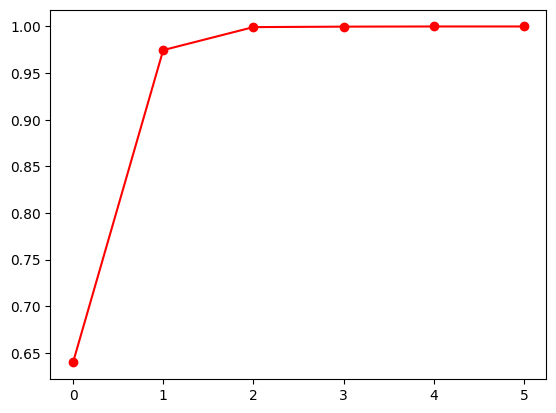

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Load dataset and prepare data before calling functions
df = pd.read_csv("/content/cleaned_data.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

print(df.head())

# Check if the columns exist before deleting
if 'type' in df.columns:
    del df['type']
if 'nameOrig' in df.columns:
    del df['nameOrig']
if 'nameDest' in df.columns:
    del df['nameDest']
if 'isFlaggedFraud' in df.columns:
    del df['isFlaggedFraud']

# Assign labels and features for training
X = df[['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']] # Defining X here
y = df['isFraud']

# Split dataset to generate training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_ = np.array(X).astype(float) # Now X is defined and available in this scope
# Subtract sample mean
X_ -= np.mean(X_, axis=1)[:, np.newaxis]
# Get eigenValues and eigenVectors by using Singular Value Decomposition
U, W, _ = np.linalg.svd(X_, full_matrices=False)
W = W ** 2 / (X.shape[1] - 1)
# Calculate cumulative sum of eigenValues
S = np.cumsum(W)
R = S / S[-1]
# Plot cumulative sum
plt.plot(R, 'ro-')
# Taking the first Kth eigenVectors to reduce dimensions, where their corresponding eigenValues' cumulative sum
# should be smaller than 0.9.
n = (R < 0.9).sum()
# Data projection to lower dimensions.
A = U[:, :n].T.dot(X_)
print (W)
print (U.shape)
print (U)

In [ ]:
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn import preprocessing
data_scaled = pd.DataFrame()

pca = PCA(n_components=6, whiten=False)
X_new = pca.fit_transform(X)

print (pd.DataFrame(pca.components_, columns=['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest'], index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6']))
print (pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

              step    amount  oldBalanceOrig  newBalanceOrig  oldBalanceDest  \
PC-1 -9.648013e-09  0.010006        0.473771        0.482444    4.834698e-01   
PC-2 -2.098622e-08 -0.004040        0.517538        0.524172   -4.301946e-01   
PC-3 -1.122255e-07 -0.018818       -0.015968       -0.002665    7.622751e-01   
PC-4  2.302727e-06  0.975753       -0.158062        0.150183    5.815304e-03   
PC-5  2.273898e-06  0.217795        0.694591       -0.685514    9.617071e-03   
PC-6  1.000000e+00 -0.000003       -0.000001        0.000001    4.592373e-08   

      newBalanceDest  
PC-1    5.558290e-01  
PC-2   -5.218366e-01  
PC-3   -6.467770e-01  
PC-4   -1.825289e-02  
PC-5   -9.326298e-03  
PC-6   -1.493512e-08  
[5.63362739e-01 4.19966737e-01 1.60862575e-02 4.68936322e-04
 1.15330284e-04 1.97772881e-13]


In [ ]:
print (X.shape, y.shape)
print (X_new.shape, y.shape)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39207, 6) (39207,)
(39207, 6) (39207,)
(27444, 6) (11763, 6) (27444,) (11763,)


In [ ]:
# Gaussian Naive Bayes classifier
GNB_CV(X_train, y_train, 20)

GNB_Train(X_train, y_train, X_test, y_test)

NameError: name 'GNB_CV' is not defined

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB

# ... (rest of your code for loading and preparing data) ...

def GNB_CV(X, y, cv_num):
    start = dt.datetime.now()
    clf = GaussianNB()
    score = cross_val_score(clf, X, y, cv=cv_num)
    print ("Cross-validation accuracy:", np.mean(score))
    print ("Cross-validation running time", dt.datetime.now()-start)

def GNB_Train(X_train, y_train, X_test, y_test):
    start = dt.datetime.now()
    clf = GaussianNB()
    y_pred = clf.fit(X_train, y_train).predict(X_train)
    print ("Training accuracy:", accuracy_score(y_train, y_pred))
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print ("Testing accuracy:", accuracy_score(y_test, y_pred))
    print ("Total running time", dt.datetime.now()-start)

# Gaussian Naive Bayes classifier
GNB_CV(X_train, y_train, 20)
GNB_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.9716665534177462
Cross-validation running time 0:00:00.361587
Training accuracy: 0.9977772919399505
Testing accuracy: 0.9986398027714019
Total running time 0:00:00.061652


In [ ]:
# prompt: give me different csv files for every payemnt type

import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('/content/data_with_locations.csv') # Assuming you have already created this file in a previous step
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()

# Get unique payment types
payment_types = df['type'].unique()

# Create separate CSV files for each payment type
for payment_type in payment_types:
    # Filter the DataFrame for the current payment type
    df_payment_type = df[df['type'] == payment_type]

    # Construct the file name
    file_name = f'/content/{payment_type}_transactions.csv'

    # Save the filtered DataFrame to a CSV file
    df_payment_type.to_csv(file_name, index=False)

    print(f"File '{file_name}' created successfully.")


File '/content/PAYMENT_transactions.csv' created successfully.
File '/content/TRANSFER_transactions.csv' created successfully.
File '/content/CASH_OUT_transactions.csv' created successfully.
File '/content/DEBIT_transactions.csv' created successfully.
File '/content/CASH_IN_transactions.csv' created successfully.


In [ ]:
# prompt: differentiate columns city and country in /content/data_with_locations.csv

import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('/content/data_with_locations.csv')
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()

# Split the 'location' column into 'city' and 'country'
df[['city', 'country']] = df['location'].str.split(', ', expand=True)

# Display the updated DataFrame (optional)
print(df.head())

# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('/content/data_with_city_country.csv', index=False)


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0      0.0             0.0   
1  M2044282225             0.0             0.0      0.0             0.0   
2   C553264065             0.0             0.0      1.0             0.0   
3    C38997010         21182.0             0.0      1.0             0.0   
4  M1230701703             0.0             0.0      0.0             0.0   

                   location              city country  
0  British Columbia, Canada  British Colum

In [ ]:
# Gaussian Naive Bayes classifier
GNB_CV(X_train, y_train, 20)
GNB_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.5699936456738558
Cross-validation running time 0:00:00.392324
Training accuracy: 0.5652966039935869
Testing accuracy: 0.5609113321431608
Total running time 0:00:00.037091


In [ ]:
# Random Forest
RFC_CV(X_train, y_train, 20)
RFC_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.9977773129853335
Cross-validation running time 0:00:02.686479
Training accuracy: 0.9977772919399505
Testing accuracy: 0.9986398027714019
Total running time 0:00:00.249573


In [ ]:
# LDA
LDA_CV(X_train, y_train, 20)
LDA_Train(X_train, y_train, X_test, y_test)

Cross-validation accuracy: 0.9977408963793613
Cross-validation running time 0:00:01.567811
Training accuracy: 0.9977408541029005
Testing accuracy: 0.9986398027714019
Total running time 0:00:00.193974


In [ ]:
# QDA
QDA_CV(X_train, y_train, 20)
QDA_Train(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Cross-validation accuracy: 0.8033861073302487
Cross-validation running time 0:00:00.851621
Training accuracy: 0.660435796531118
Testing accuracy: 0.6495791889824024
Total running time 0:00:00.058003


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

In [ ]:
# Logistic Regression
LR_CV(X_train, y_train, 10)
LR_Train(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy: 0.9982145246857526
Cross-validation running time 0:00:03.265639


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9981416703104504
Testing accuracy: 0.9988098274249766
Total running time 0:00:00.747622


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
